# Efficient Set for two stocks and the capital allocation line #

---

In [1]:
from IPython.display import display, Math, Latex
from sympy import *
import math
import numpy as np
import pandas as pd
from sympy.plotting import plot as symplot
from sympy import Array
import matplotlib.pyplot as plt

---

**Example with the following coefficients for two stocks A and B:**

In [2]:
Rf = 0.03
r_a, S_a = 0.20, 0.50
r_b, S_b = 0.15, 0.33
Corr = 0  # give me a break!

**The following are symbols:**

In [3]:
W_a, R, W_b, S = symbols('W_a R W_b S')

**Expected return on the portfolio:**

In [4]:
R = r_a * W_a + r_b * W_b
R

0.2*W_a + 0.15*W_b

**But note: $W_b = 1-W_a$**

In [5]:
W_b = 1-W_a
R = r_a * W_a + r_b * W_b
R = simplify(R)
R

0.05*W_a + 0.15

**Portfolio variance:**
$$
\begin{aligned}
&\sigma_{P}^{2}=w_{1}^{2} \sigma_{1}^{2}+w_{2}^{2} \sigma_{2}^{2}+2 w_{1} w_{2} \operatorname{Cov}\left(R_{1}, R_{2}\right) \\
&\sigma_{P}^{2}=w_{1}^{2} \sigma_{1}^{2}+w_{2}^{2} \sigma_{2}^{2}+2 w_{1} w_{2} \rho_{12} \sigma_{1} \sigma_{2}
\end{aligned}
$$
**Portfolio sigma:**

In [6]:
S_rp = (W_a**2)*(S_a**2) + (W_b**2)*(S_b**2) + 2*W_a*W_b*Corr*S_a*S_b
S_rp = sqrt(S_rp) #**.5
S_rp

0.5*sqrt(W_a**2 + 0.4356*(1 - W_a)**2)

**Using a 10% portfolio weight for $W_a$:**

In [7]:
R.subs(W_a, 0.1)

0.155000000000000

In [8]:
S_rp.subs(W_a, 0.1)

0.301179348561617

---

### Set an Array of Portfolio Weights ###

---

In [9]:
wgt = np.arange(-0.5,1.5,0.05)
wgt

array([-5.00000000e-01, -4.50000000e-01, -4.00000000e-01, -3.50000000e-01,
       -3.00000000e-01, -2.50000000e-01, -2.00000000e-01, -1.50000000e-01,
       -1.00000000e-01, -5.00000000e-02, -1.11022302e-16,  5.00000000e-02,
        1.00000000e-01,  1.50000000e-01,  2.00000000e-01,  2.50000000e-01,
        3.00000000e-01,  3.50000000e-01,  4.00000000e-01,  4.50000000e-01,
        5.00000000e-01,  5.50000000e-01,  6.00000000e-01,  6.50000000e-01,
        7.00000000e-01,  7.50000000e-01,  8.00000000e-01,  8.50000000e-01,
        9.00000000e-01,  9.50000000e-01,  1.00000000e+00,  1.05000000e+00,
        1.10000000e+00,  1.15000000e+00,  1.20000000e+00,  1.25000000e+00,
        1.30000000e+00,  1.35000000e+00,  1.40000000e+00,  1.45000000e+00])

**Create an array of returns and one of sigmas based on the portfolio weights:**

In [10]:
returns = lambdify(W_a, R, "numpy")
returns = returns(wgt)

stdevs = lambdify(W_a, S_rp, "numpy")
stdevs = stdevs(wgt)


In [11]:
returns

array([0.125 , 0.1275, 0.13  , 0.1325, 0.135 , 0.1375, 0.14  , 0.1425,
       0.145 , 0.1475, 0.15  , 0.1525, 0.155 , 0.1575, 0.16  , 0.1625,
       0.165 , 0.1675, 0.17  , 0.1725, 0.175 , 0.1775, 0.18  , 0.1825,
       0.185 , 0.1875, 0.19  , 0.1925, 0.195 , 0.1975, 0.2   , 0.2025,
       0.205 , 0.2075, 0.21  , 0.2125, 0.215 , 0.2175, 0.22  , 0.2225])

In [12]:
stdevs

array([0.55454937, 0.52876011, 0.50343222, 0.47863896, 0.45446782,
       0.43102349, 0.40843114, 0.38684008, 0.36642735, 0.34740071,
       0.33      , 0.31449523, 0.30117935, 0.29035366, 0.2823048 ,
       0.27727468, 0.27542876, 0.27683072, 0.28143205, 0.28908001,
       0.29954132, 0.3125336 , 0.32775601, 0.34491339, 0.36373204,
       0.38396777, 0.40540844, 0.42787294, 0.45120838, 0.47528649,
       0.5       , 0.52525922, 0.55098911, 0.57712672, 0.60361909,
       0.63042149, 0.65749601, 0.68481038, 0.712337  , 0.74005219])

**Create a data frame with returns and stdevs**

In [13]:
dfeff = pd.DataFrame({'Sigma': stdevs, 'Return': returns}, columns=['Sigma', 'Return'])
maxx = dfeff['Sigma'].max()
dfeff.set_index('Sigma', inplace=True)
print(maxx)
dfeff.head(3)

0.7400521941052534


,Return
Sigma,
0.554549,0.1250
0.528760,0.1275
0.503432,0.1300


(0.0, 0.22249999999999998)

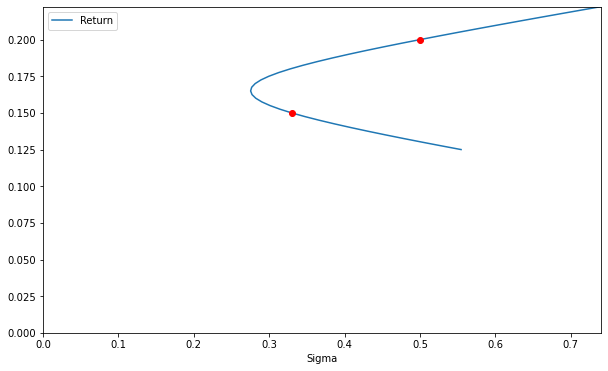

In [14]:
ax = plt.subplot()
dfeff.plot(ax=ax, figsize=(10,6))
plt.plot(S_a,r_a,'ro')
plt.plot(S_b,r_b,'ro')
#y = Rf + beta_p*wgt
#plt.plot(wgt, y, '-k')
plt.xlim(0.0, maxx)
plt.ylim(0.0, dfeff['Return'].max())
#print(f"\nOptimal Weight A: {WOpt: .5f}")
#print(f"\nCal: Rp = {Rf:.3f} + {beta_p:.5f} * Sp ")

---

### In one function ###

---

In [15]:
def eff_portfolio(r_a, S_a, r_b, S_b, Corr):
    
    #Rf, r_a, S_a, r_b, S_b, Corr = 0.03, 0.20, 0.50, 0.15, 0.33, 0

    W_a, R, W_b, S = symbols('W_a R W_b S')
    W_b = 1 - W_a
    R = r_a * W_a + r_b * W_b
    R = simplify(R)

    S_rp = (W_a**2)*(S_a**2) + (W_b**2)*(S_b**2) + 2*W_a*W_b*Corr*S_a*S_b
    S_rp = sqrt(S_rp) 

    wgt = np.arange(-0.5,1.5,0.05)

    returns = lambdify(W_a, R, "numpy")
    returns = returns(wgt)

    stdevs = lambdify(W_a, S_rp, "numpy")
    stdevs = stdevs(wgt)

    dfeff = pd.DataFrame({'Sigma': stdevs, 'Return': returns}, columns=['Sigma', 'Return'])
    maxx = dfeff['Sigma'].max()
    dfeff.set_index('Sigma', inplace=True)

    ax = plt.subplot()
    dfeff.plot(ax=ax, figsize=(10,6))
    plt.plot(S_a,r_a,'ro')
    plt.plot(S_b,r_b,'ro')
    plt.xlim(0.0, maxx)
    plt.ylim(0.0, dfeff['Return'].max())
    plt.legend([f'Correlation: {Corr}'])
    plt.show()
    return dfeff 

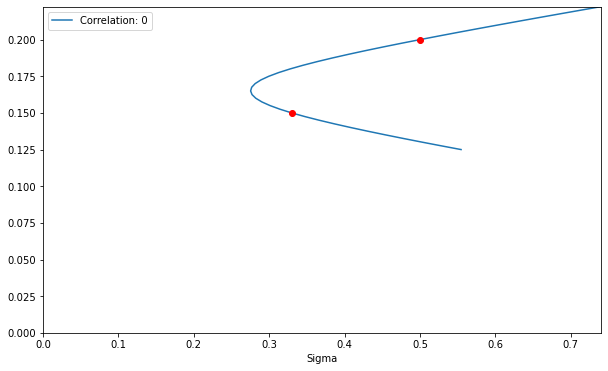

In [16]:
#                     r_a,   S_a, r_b,  S_b,  Corr
dfeff = eff_portfolio(0.20, 0.50, 0.15, 0.33, 0)

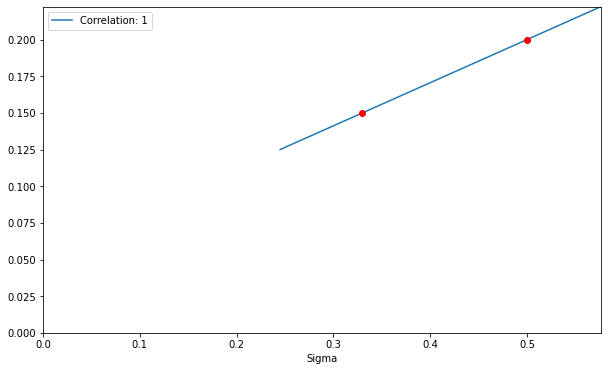

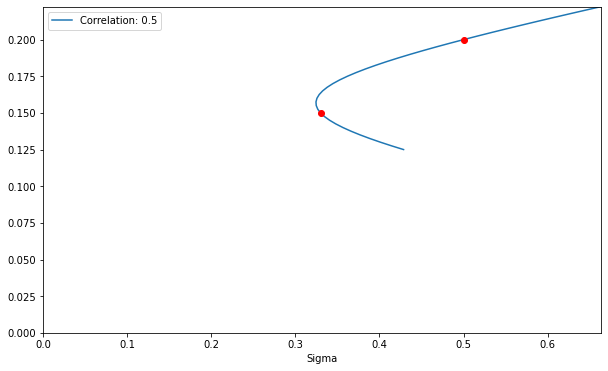

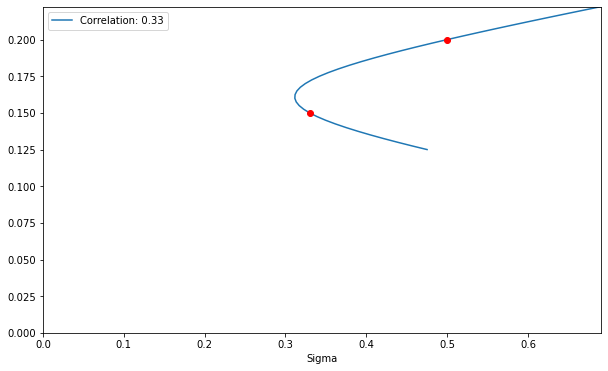

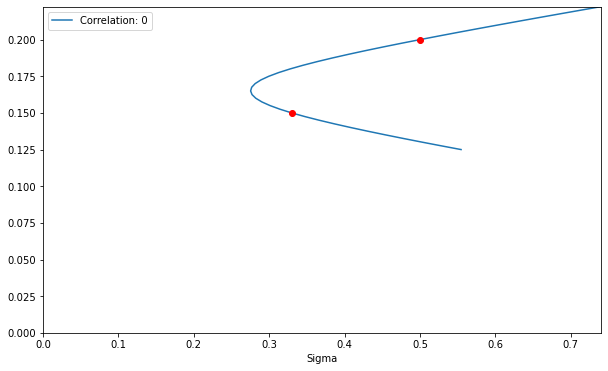

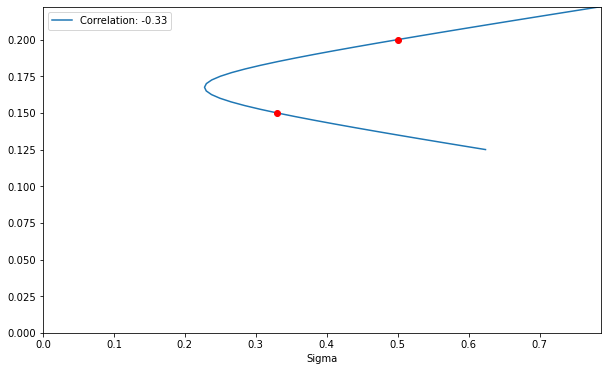

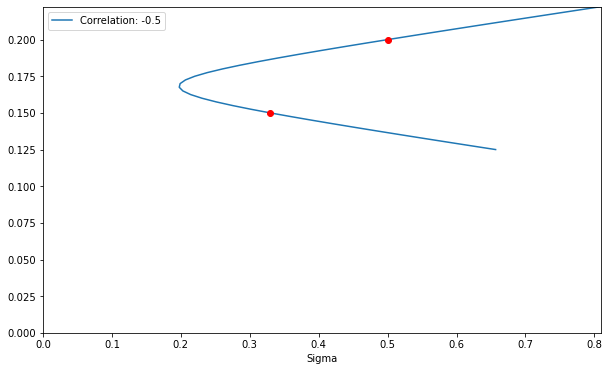

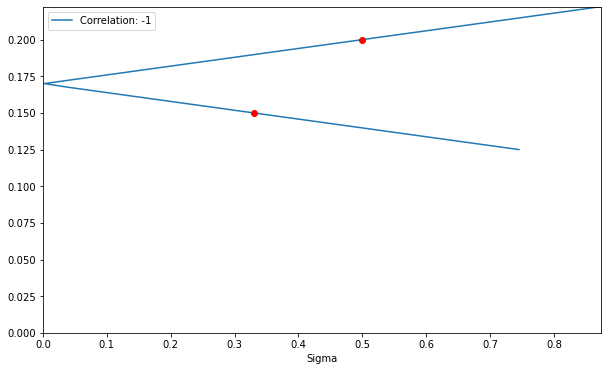

In [17]:
for correlation in [1, .5, .33, 0, -.33, -.5, -1]:
    eff_portfolio(0.20, 0.50, 0.15, 0.33, correlation)

---
**Defining the CAL:**


**Portfolio variance, with a risk-free security $(f)$ and a risky asset $(i)$:**

$$
\begin{aligned}
&\sigma_{P}^{2}=w_{i}^{2} \sigma_{i}^{2}+w_{f}^{2} \sigma_{f}^{2}+2 w_{i} w_{f} \operatorname{Cov}\left(R_{i}, R_{f}\right) \\
&\sigma_{P}^{2}=w_{i}^{2} \sigma_{i}^{2}+w_{f}^{2} \sigma_{f}^{2}+2 w_{i} w_{f} \rho_{12} \sigma_{i} \sigma_{f}
\end{aligned}
$$



**Introducing a risk-free security:**
$$
\begin{aligned}
\sigma_f &= 0
\end{aligned}
$$

**The resulting portfolio variance will now be:**

$$
\begin{aligned}
\sigma_p &= \sqrt{w_i^2 \sigma_i^2 + w_f^2 \cdot 0 + 2 w_i w_f Corr \cdot \sigma_i\cdot 0}\\
\sigma_p &= \sqrt{w_i^2 \sigma_i^2}\\
\sigma_p &= w_i \sigma_i
\end{aligned}
$$

**Note :**
$$
\begin{aligned}
w_i &= 1 - w_f
\end{aligned}
$$

**Therefore :**
$$
\begin{aligned}
\sigma_p &= (1 - w_f) \sigma_i\\
\end{aligned}
$$

**Expected Returns (R):**
$$
\begin{aligned}
R &= r_i w_i + r_f w_f \\ 
R &= r_i (1 - w_f) + r_f w_f
\end{aligned}
$$


**Rewriting**

$$
\begin{aligned}
\sigma_p &= (1 - w_f) \sigma_i:\\
w_f &= 1-\frac{\sigma_p}{\sigma_i}
\end{aligned}
$$

**Expected Returns (R):**
$$
\begin{aligned}
R &= r_i (1 - w_f) + r_f (1-\frac{\sigma_p}{\sigma_i})\\
R &= r_f + \frac{r_i-r_f}{\sigma_i}\sigma_p
\end{aligned}
$$

**In case we hold the market:**
$$
\begin{aligned}
R &= r_f + \frac{r_m-r_f}{\sigma_m}\sigma_p
\end{aligned}
$$


In [18]:
ERp = Rf + S*(R-Rf)/S_rp  # S_rp = the risky portfolio, S is sigma of the two risky assets and one risk-free asset.

ERp

2.0*S*(0.05*W_a + 0.12)/sqrt(W_a**2 + 0.4356*(1 - W_a)**2) + 0.03

**The highest slope value ($\beta$) for this portfolio can be found by differentiating the slope $(\frac{R-Rf}{\sigma_i})$ with respect to $W_a$:**

In [19]:
beta= (R-Rf)/S_rp
beta

2.0*(0.05*W_a + 0.12)/sqrt(W_a**2 + 0.4356*(1 - W_a)**2)

In [20]:
dbeta = diff(beta, W_a)
dbeta

2.0*(0.4356 - 1.4356*W_a)*(0.05*W_a + 0.12)/(W_a**2 + 0.4356*(1 - W_a)**2)**(3/2) + 0.1/sqrt(W_a**2 + 0.4356*(1 - W_a)**2)

Find the maximum slope value for our portfolio:

In [21]:
WOpt = solve(dbeta, W_a)[0]
WOpt

0.381609053243461

In [22]:
cal = ERp.subs({W_a: WOpt})
cal

0.49782668164601*S + 0.03

In [23]:
beta_p = diff(cal, S)
beta_p

0.497826681646010

In [24]:
def capital_allocation_line(Rf, r_a, S_a, r_b, S_b, Corr, plotcal):
    
    #Rf, r_a, S_a, r_b, S_b, Corr = 0.03, 0.20, 0.50, 0.15, 0.33, 0

    W_a, R, W_b, S = symbols('W_a R W_b S')
    W_b = 1 - W_a
    R = r_a * W_a + r_b * W_b
    R = simplify(R)

    S_rp = (W_a**2)*(S_a**2) + (W_b**2)*(S_b**2) + 2*W_a*W_b*Corr*S_a*S_b
    S_rp = sqrt(S_rp) 

    ERp = Rf + S*(R-Rf)/S_rp

    beta= (R-Rf)/S_rp
    dbeta = diff(beta, W_a)


    WOpt = solve(dbeta, W_a)[0]

    cal = ERp.subs({W_a: WOpt})

    beta_p = diff(cal, S)

    wgt = np.arange(-0.5,1.5,0.05)

    returns = lambdify(W_a, R, "numpy")
    returns = returns(wgt)

    stdevs = lambdify(W_a, S_rp, "numpy")
    stdevs = stdevs(wgt)

    dfeff = pd.DataFrame({'Sigma': stdevs, 'Return': returns}, columns=['Sigma', 'Return'])
    maxx = dfeff['Sigma'].max()
    dfeff.set_index('Sigma', inplace=True)

    ax = plt.subplot()
    dfeff.plot(ax=ax, figsize=(10,6))
    plt.plot(S_a,r_a,'ro')
    plt.plot(S_b,r_b,'ro')
    y = Rf + beta_p*wgt
    if plotcal:
        plt.plot(wgt, y, '-k')
    plt.xlim(0.0, maxx)
    plt.ylim(0.0, dfeff['Return'].max())
    plt.legend([f'Correlation: {Corr}'])
    
    print(f"\nOptimal Weight A: {WOpt: .5f}")
    print(f"\nCal: E(Rp) = {Rf:.3f} + {beta_p:.5f} * S_rp ")
    plt.show()
    #return R, S_rp, dfeff, cal, WOpt


Optimal Weight A:  0.38161

Cal: E(Rp) = 0.030 + 0.49783 * S_rp 


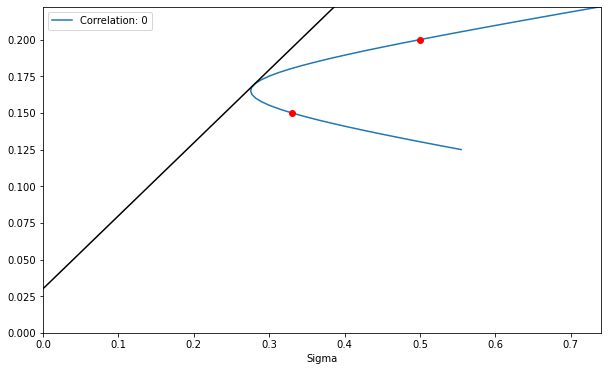

In [25]:
capital_allocation_line (0.03, 0.20, 0.50, 0.15, 0.33, 0, True)


Optimal Weight A: -1657500000000000.00000

Cal: E(Rp) = 0.030 + -0.29412 * S_rp 


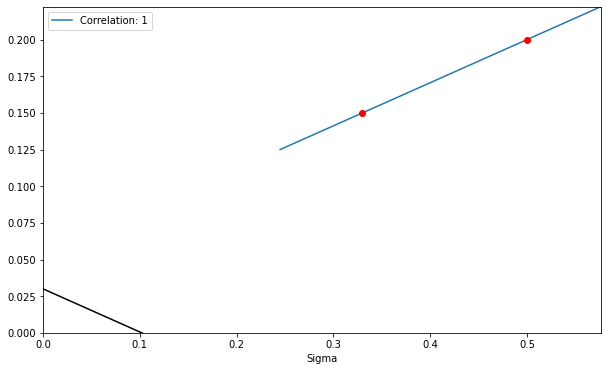


Optimal Weight A:  0.35029

Cal: E(Rp) = 0.030 + 0.40693 * S_rp 


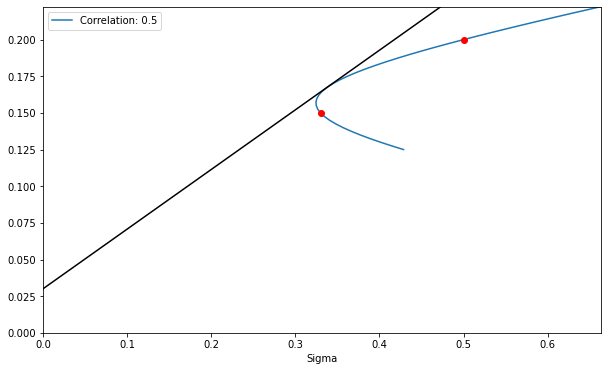


Optimal Weight A:  0.36608

Cal: E(Rp) = 0.030 + 0.43191 * S_rp 


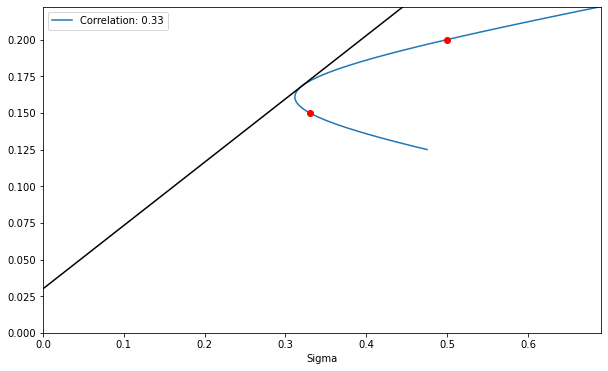


Optimal Weight A:  0.38161

Cal: E(Rp) = 0.030 + 0.49783 * S_rp 


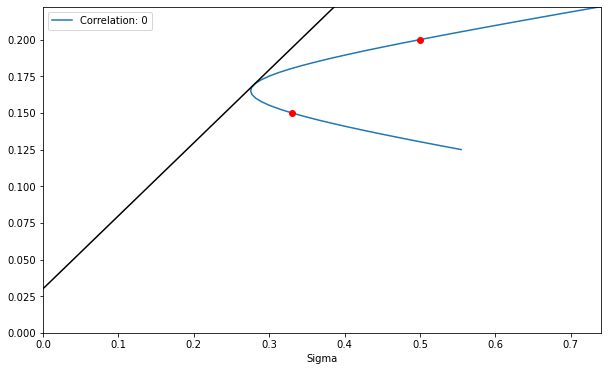


Optimal Weight A:  0.38951

Cal: E(Rp) = 0.030 + 0.60802 * S_rp 


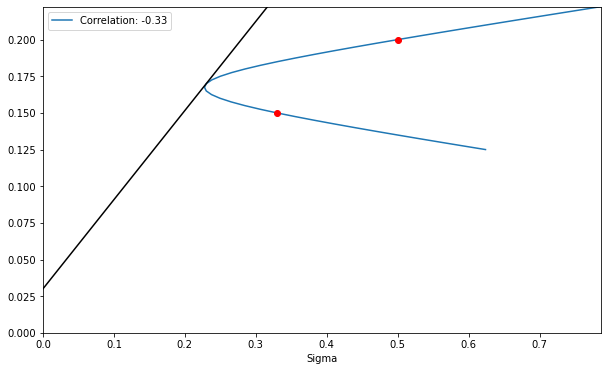


Optimal Weight A:  0.39224

Cal: E(Rp) = 0.030 + 0.70377 * S_rp 


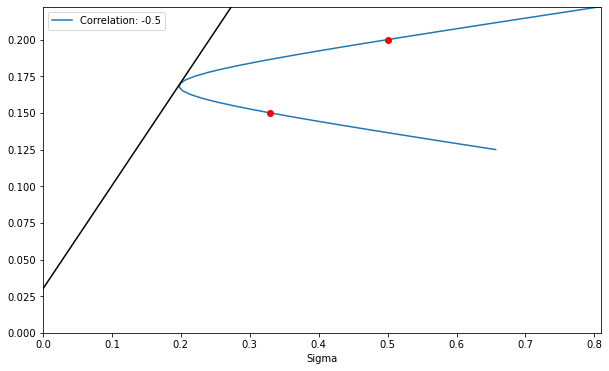


Optimal Weight A: -2409075000000000.00000

Cal: E(Rp) = 0.030 + -0.06024 * S_rp 


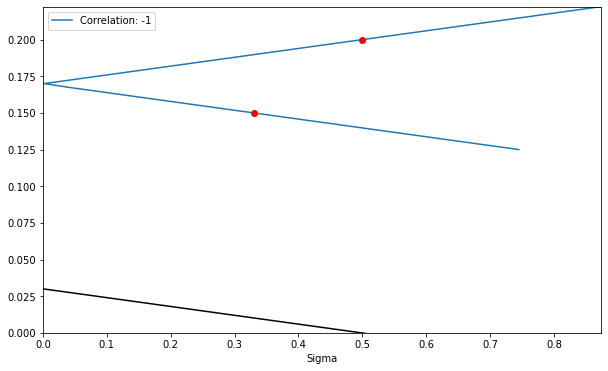

In [26]:
for correlation in [1, .5, .33, 0, -.33, -.5, -1]:
    capital_allocation_line(0.03, 0.20, 0.50, 0.15, 0.33, correlation, True)